In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML as html_print


In [2]:
pd.set_option('display.max_columns', None)

pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_excel('lfg_projects_data.xlsx', sheet_name="LMOP Database")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   GHGRP ID                                                 515 non-null    object        
 1   Landfill ID                                              542 non-null    object        
 2   Landfill Name                                            542 non-null    object        
 3   State                                                    542 non-null    object        
 4   County                                                   542 non-null    object        
 5   Landfill Owner Organization(s)                           542 non-null    object        
 6   Parent Project ID                                        542 non-null    int64         
 7   Current Project Status                               

In [5]:
df.head()

,GHGRP ID,Landfill ID,Landfill Name,State,County,Landfill Owner Organization(s),Parent Project ID,Current Project Status,Initial Project Start Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Total Actual MW Generation,Total Rated MW Capacity,Total LFG Flow to Project (mmscfd),End User(s),Project Developer(s),Project Owner(s),Product Supplier(s),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided
0,1007341,1994,Anchorage Regional Landfill,AK,Anchorage,"Municipality of Anchorage, AK",167079,Operational,2012-07-31,Electricity,Reciprocating Engine,NaN,4.780,7.000,2.156,Joint Base Elmendorf Richardson (JBER),"Doyon Utilities, LLC","Doyon Utilities, LLC",GE Energy - Jenbacher Gas Engines; Western Ene...,0.242,0.023
1,1001633,23,Cedar Hill Landfill,AL,St. Clair,WM,78,Operational,2020-01-01,Direct,Leachate Evaporation,NaN,NaN,0.000,0.574,WM,Advanced Disposal Services; WM,WM,Fluid Components International (FCI),0.056,0.005
2,1010661,2,City of Decatur-Morgan County Regional MSW Lan...,AL,Morgan,"City of Decatur, AL; Morgan County, AL",181062,Operational,2010-08-02,Electricity,Reciprocating Engine; Cogeneration,NaN,1.370,1.800,0.740,Tennessee Valley Authority (TVA),"Granger Energy; City of Decatur, AL","EDL Energy; City of Decatur, AL","Caterpillar, Inc.; GraniteFuel",0.069,0.007
3,1006304,2410,Sand Valley Landfill,AL,DeKalb,"Republic Services, Inc.",180771,Operational,2013-11-26,Electricity,Reciprocating Engine,NaN,3.720,4.800,2.270,Tennessee Valley Authority (TVA),EDL Energy,EDL Energy,"Caterpillar, Inc.",0.188,0.018
4,1007796,2204,Three Corners Landfill,AL,Cherokee,WM,180288,Operational,2020-01-01,Direct,Leachate Evaporation,NaN,NaN,0.000,0.610,WM,WM,WM,NaN,0.060,0.005


In [6]:
df.isna().sum()

GHGRP ID                                                    27
Landfill ID                                                  0
Landfill Name                                                0
State                                                        0
County                                                       0
Landfill Owner Organization(s)                               0
Parent Project ID                                            0
Current Project Status                                       0
Initial Project Start Date                                   0
Project Type Category                                        0
LFG Energy Project Type                                      0
RNG Delivery Method                                        432
Total Actual MW Generation                                 204
Total Rated MW Capacity                                     40
Total LFG Flow to Project (mmscfd)                          59
End User(s)                                            

In [7]:
df['Total Rated MW Capacity'].dropna(inplace=True)

In [8]:
# fill the missing values using the median within similar project type category
df['Total Actual MW Generation'] = df.groupby('Project Type Category')['Total Actual MW Generation'].transform(lambda x: x.fillna(x.median()))


In [9]:
# drop missing columns
df.dropna(subset=['Total Actual MW Generation', 'Total Rated MW Capacity', 'Total LFG Flow to Project (mmscfd)'], inplace=True)

In [10]:

# Drop unnecessary columns
columns_to_drop = ['Landfill Name', 'GHGRP ID', 'Landfill ID', 'County', 'End User(s)', 'RNG Delivery Method', 
                   'Landfill Owner Organization(s)', 'Project Owner(s)', 'Product Supplier(s)', 
                   'Parent Project ID', 'Project Developer(s)']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
# drop all duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.iloc[0]

State                                                                        AK
Current Project Status                                              Operational
Initial Project Start Date                                  2012-07-31 00:00:00
Project Type Category                                               Electricity
LFG Energy Project Type                                    Reciprocating Engine
Total Actual MW Generation                                                4.780
Total Rated MW Capacity                                                   7.000
Total LFG Flow to Project (mmscfd)                                        2.156
Current Year Emission Reductions (MMTCO2e/yr) - Direct                    0.242
Current Year Emission Reductions (MMTCO2e/yr) - Avoided                   0.023
Name: 0, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 540
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   State                                                    391 non-null    object        
 1   Current Project Status                                   391 non-null    object        
 2   Initial Project Start Date                               391 non-null    datetime64[ns]
 3   Project Type Category                                    391 non-null    object        
 4   LFG Energy Project Type                                  391 non-null    object        
 5   Total Actual MW Generation                               391 non-null    float64       
 6   Total Rated MW Capacity                                  391 non-null    float64       
 7   Total LFG Flow to Project (mmscfd)                   

In [14]:
df.to_excel(excel_writer='lfg_cleaned.xlsx')

# handle outliers

In [15]:
df = pd.read_excel('lfg_cleaned.xlsx')

In [16]:
df.describe()

,Unnamed: 0,Total Actual MW Generation,Total Rated MW Capacity,Total LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided
count,391.000,391.000,391.000,391.000,391.000,391.000
mean,275.422,3.599,4.250,2.198,0.205,0.019
std,157.059,3.244,5.581,2.501,0.228,0.020
min,0.000,0.006,0.000,0.001,0.000,0.000
25%,135.500,1.500,0.268,0.702,0.067,0.006
50%,284.000,3.170,3.200,1.450,0.139,0.013
75%,408.500,4.400,5.350,2.695,0.247,0.022
max,540.000,28.080,50.000,19.420,1.853,0.149


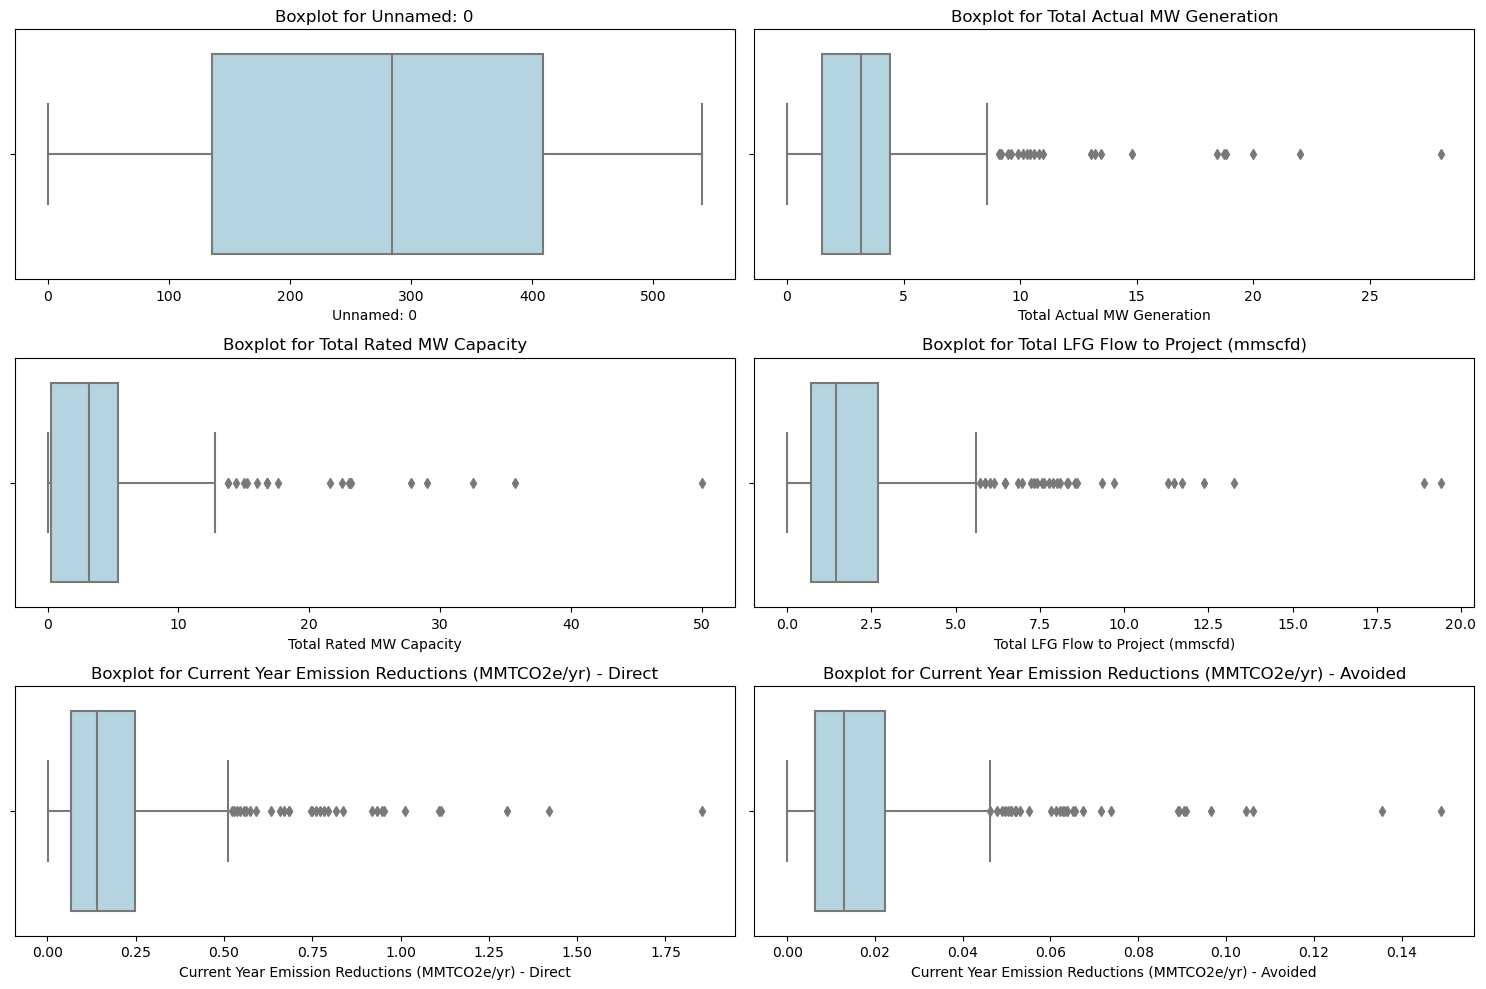

In [17]:
# Step 1: Visualize Outliers Using Boxplots
numerical_columns = df.select_dtypes(include=['float64', 'int']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=column, color='lightblue')
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

In [18]:

# Detect and Remove Outliers Using IQR Method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers by filtering data within the lower and upper bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the remove_outliers function to each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int']).columns

for column in numerical_columns:
    df = remove_outliers(df, column)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 390
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Unnamed: 0                                               328 non-null    int64         
 1   State                                                    328 non-null    object        
 2   Current Project Status                                   328 non-null    object        
 3   Initial Project Start Date                               328 non-null    datetime64[ns]
 4   Project Type Category                                    328 non-null    object        
 5   LFG Energy Project Type                                  328 non-null    object        
 6   Total Actual MW Generation                               328 non-null    float64       
 7   Total Rated MW Capacity                              

In [20]:
df.to_excel(excel_writer='lfg_cleaned2.xlsx')

In [21]:
df.describe()

,Unnamed: 0,Total Actual MW Generation,Total Rated MW Capacity,Total LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided
count,328.000,328.000,328.000,328.000,328.000,328.000
mean,271.082,2.724,3.100,1.359,0.128,0.012
std,156.755,1.629,2.660,0.938,0.085,0.008
min,0.000,0.006,0.000,0.001,0.000,0.000
25%,133.000,1.260,0.924,0.577,0.059,0.006
50%,275.000,2.635,3.200,1.227,0.119,0.011
75%,406.250,4.400,4.800,1.960,0.184,0.017
max,540.000,6.720,11.000,4.432,0.379,0.032


# EDA and Analysis

In [22]:
# Set seaborn style for better visualization aesthetics
sns.set(style="whitegrid")

In [23]:

# 1. General Summary Statistics
summary_stats = df.describe()
print(summary_stats)  # To see basic summary statistics

       Unnamed: 0  Total Actual MW Generation  Total Rated MW Capacity  \
count     328.000                     328.000                  328.000   
mean      271.082                       2.724                    3.100   
std       156.755                       1.629                    2.660   
min         0.000                       0.006                    0.000   
25%       133.000                       1.260                    0.924   
50%       275.000                       2.635                    3.200   
75%       406.250                       4.400                    4.800   
max       540.000                       6.720                   11.000   

       Total LFG Flow to Project (mmscfd)  \
count                             328.000   
mean                                1.359   
std                                 0.938   
min                                 0.001   
25%                                 0.577   
50%                                 1.227   
75%               

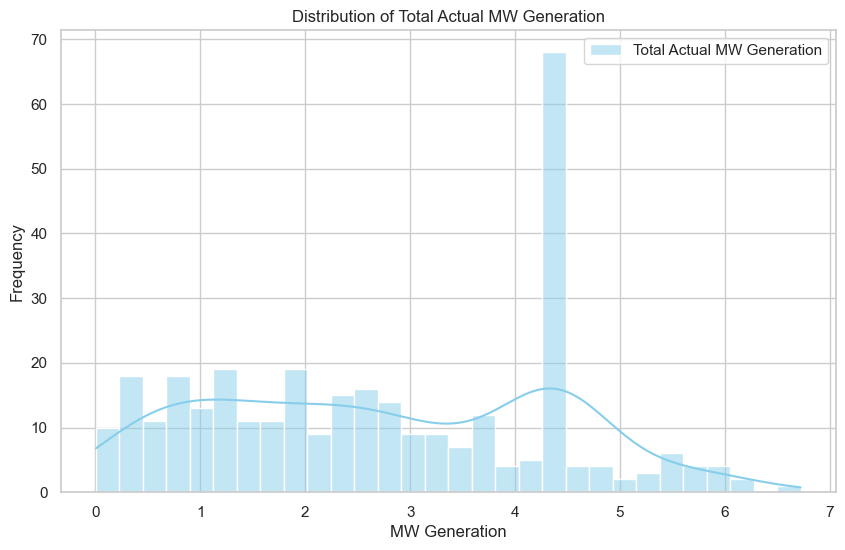

In [24]:
# 2. Visualizing Total Actual MW Generation and Total Rated MW Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Actual MW Generation'], bins=30, kde=True, color='skyblue', label='Total Actual MW Generation')
plt.title('Distribution of Total Actual MW Generation')
plt.xlabel('MW Generation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

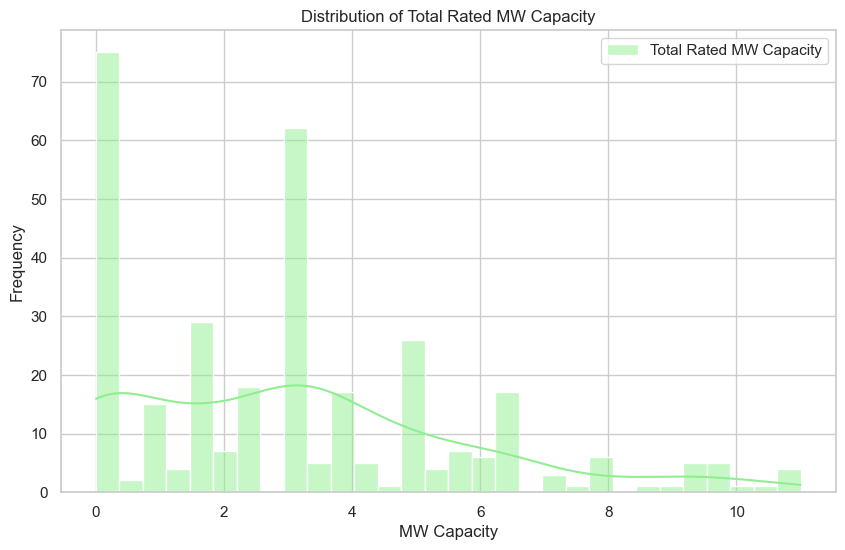

In [25]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Total Rated MW Capacity'], bins=30, kde=True, color='lightgreen', label='Total Rated MW Capacity')
plt.title('Distribution of Total Rated MW Capacity')
plt.xlabel('MW Capacity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


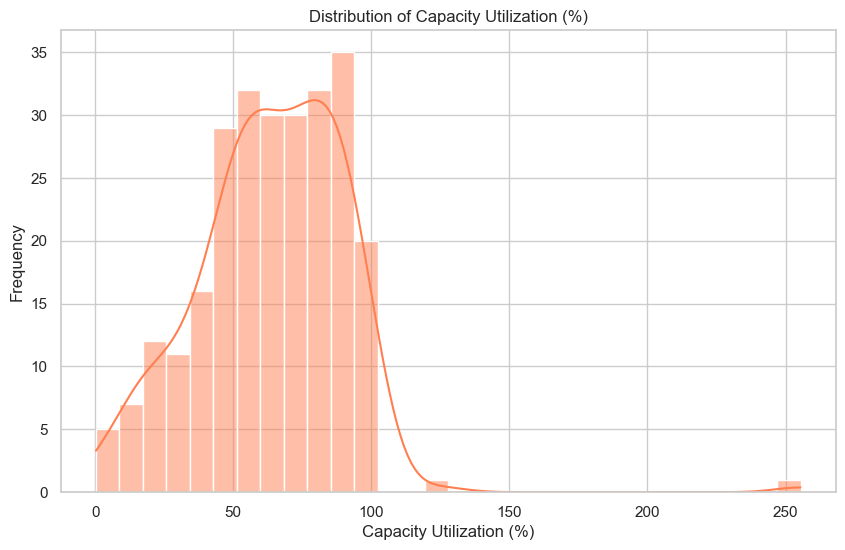

In [26]:

# 3. Capacity Utilization Analysis
# Create Capacity Utilization Column
df['Capacity Utilization (%)'] = (df['Total Actual MW Generation'] / df['Total Rated MW Capacity']) * 100

plt.figure(figsize=(10, 6))
sns.histplot(df['Capacity Utilization (%)'], bins=30, kde=True, color='coral')
plt.title('Distribution of Capacity Utilization (%)')
plt.xlabel('Capacity Utilization (%)')
plt.ylabel('Frequency')
plt.show()


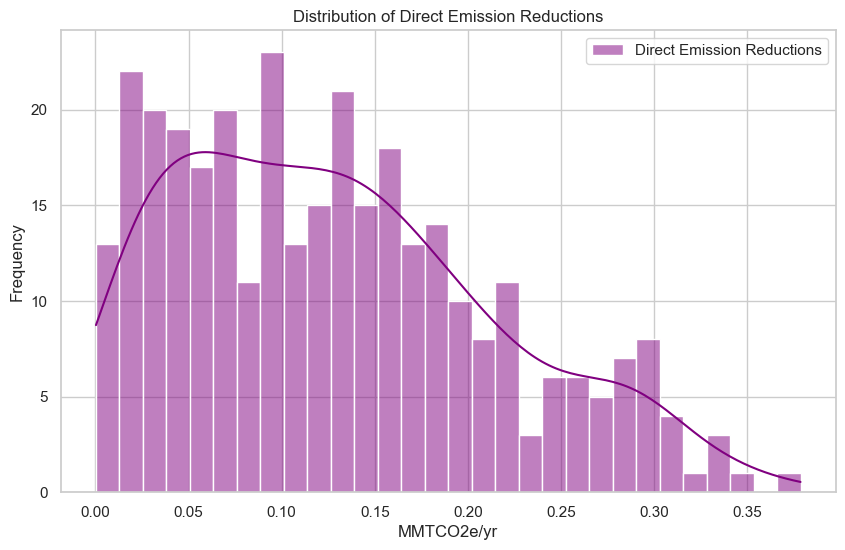

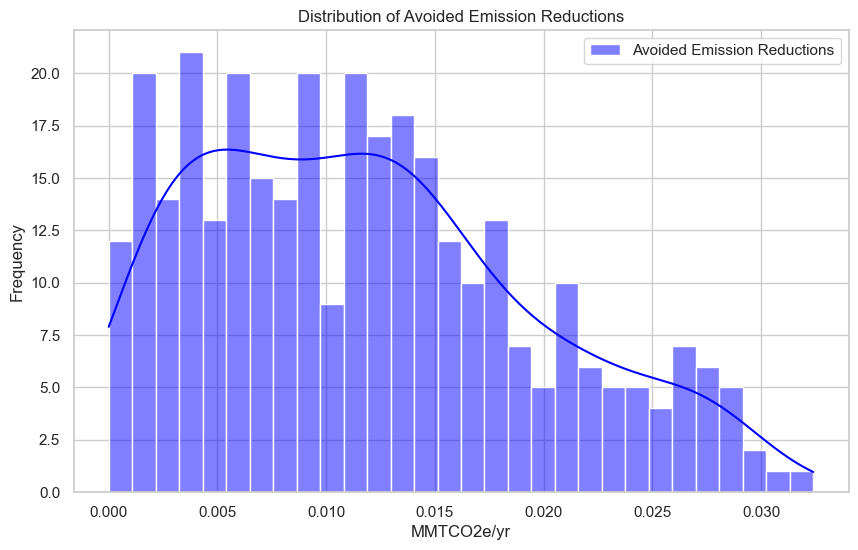

In [27]:

# 4. Emission Reductions Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Current Year Emission Reductions (MMTCO2e/yr) - Direct'], bins=30, kde=True, color='purple', label='Direct Emission Reductions')
plt.title('Distribution of Direct Emission Reductions')
plt.xlabel('MMTCO2e/yr')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Current Year Emission Reductions (MMTCO2e/yr) - Avoided'], bins=30, kde=True, color='blue', label='Avoided Emission Reductions')
plt.title('Distribution of Avoided Emission Reductions')
plt.xlabel('MMTCO2e/yr')
plt.ylabel('Frequency')
plt.legend()
plt.show()


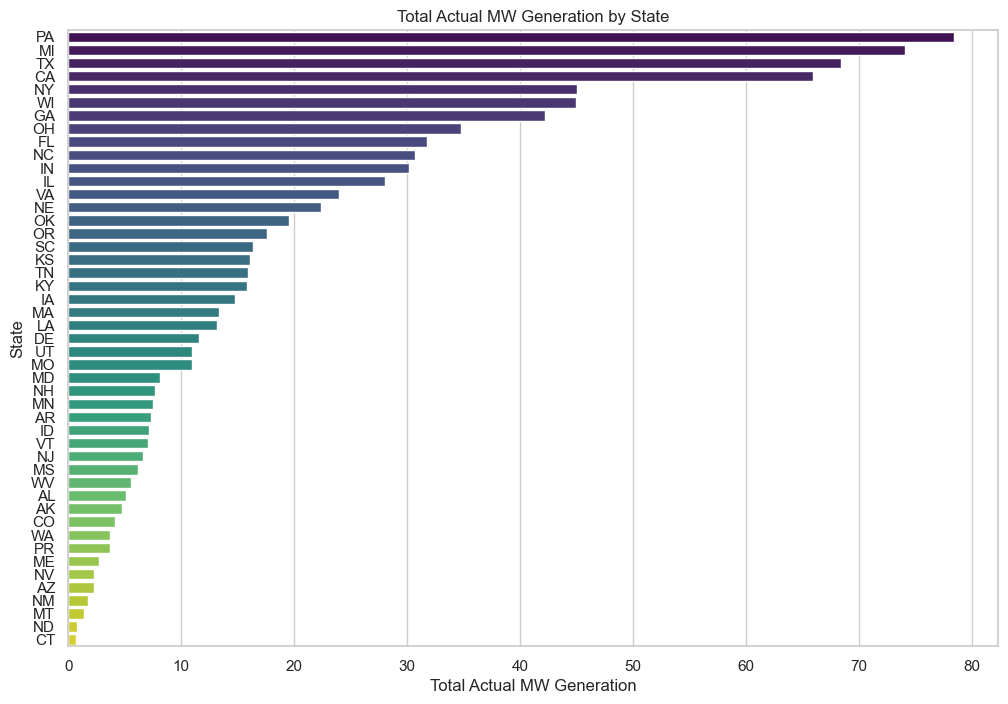

In [28]:

# 5. Energy Generation by State
plt.figure(figsize=(12, 8))
state_generation = df.groupby('State')['Total Actual MW Generation'].sum().reset_index()
state_generation = state_generation.sort_values(by='Total Actual MW Generation', ascending=False)

sns.barplot(data=state_generation, x='Total Actual MW Generation', y='State', palette='viridis')
plt.title('Total Actual MW Generation by State')
plt.xlabel('Total Actual MW Generation')
plt.ylabel('State')
plt.show()


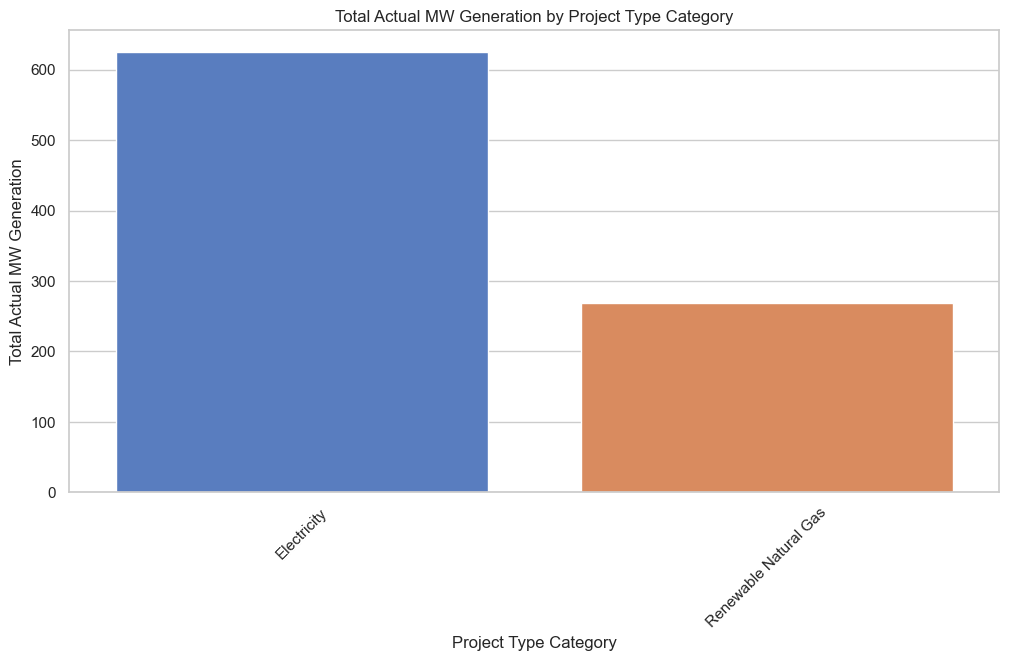

In [29]:

# 6. Project Type Category Analysis
plt.figure(figsize=(12, 6))
project_type_generation = df.groupby('Project Type Category')['Total Actual MW Generation'].sum().reset_index()
sns.barplot(data=project_type_generation, x='Project Type Category', y='Total Actual MW Generation', palette='muted')
plt.title('Total Actual MW Generation by Project Type Category')
plt.xlabel('Project Type Category')
plt.ylabel('Total Actual MW Generation')
plt.xticks(rotation=45)
plt.show()


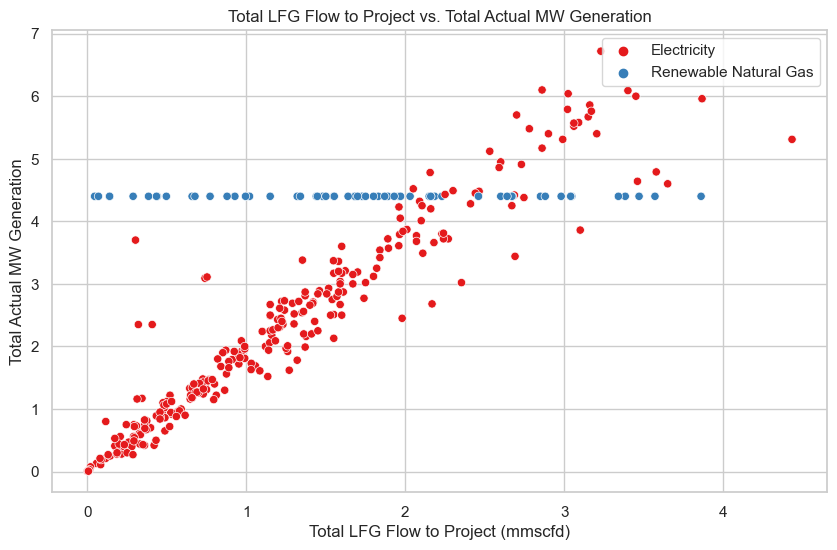

In [30]:

# 7. LFG Flow vs. MW Generation Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total LFG Flow to Project (mmscfd)', y='Total Actual MW Generation', hue='Project Type Category', palette='Set1')
plt.title('Total LFG Flow to Project vs. Total Actual MW Generation')
plt.xlabel('Total LFG Flow to Project (mmscfd)')
plt.ylabel('Total Actual MW Generation')
plt.legend()
plt.show()


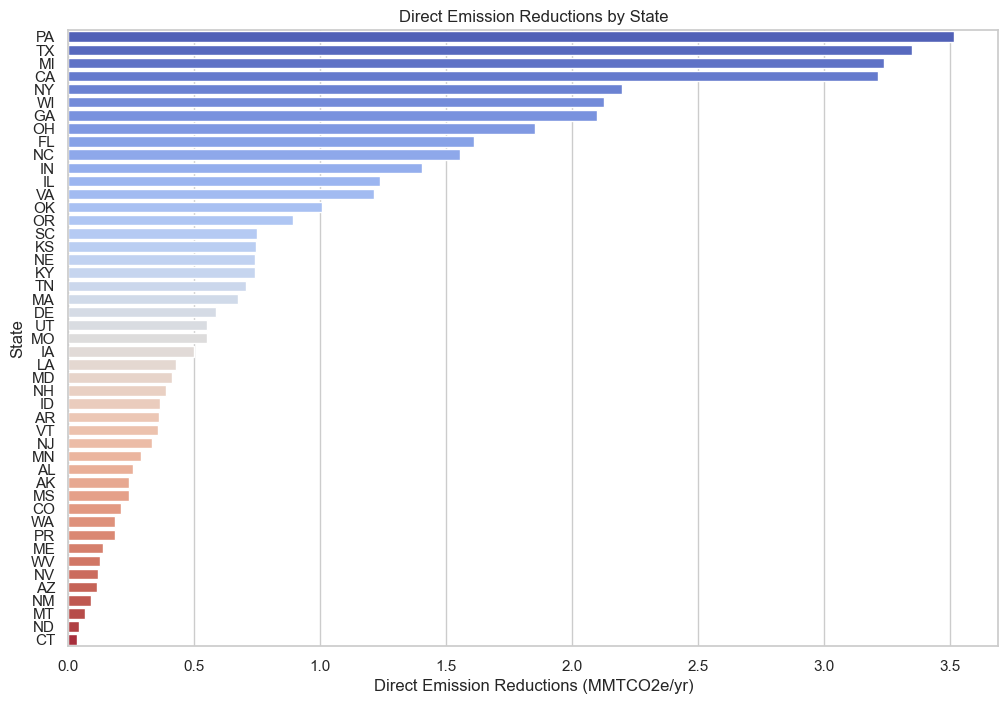

In [31]:

# 8. Emission Reductions by State
plt.figure(figsize=(12, 8))
state_emission_reduction = df.groupby('State')['Current Year Emission Reductions (MMTCO2e/yr) - Direct'].sum().reset_index()
state_emission_reduction = state_emission_reduction.sort_values(by='Current Year Emission Reductions (MMTCO2e/yr) - Direct', ascending=False)

sns.barplot(data=state_emission_reduction, x='Current Year Emission Reductions (MMTCO2e/yr) - Direct', y='State', palette='coolwarm')
plt.title('Direct Emission Reductions by State')
plt.xlabel('Direct Emission Reductions (MMTCO2e/yr)')
plt.ylabel('State')
plt.show()


# Analysis


## 시간에 따른 발전량 및 배출 감소 분석

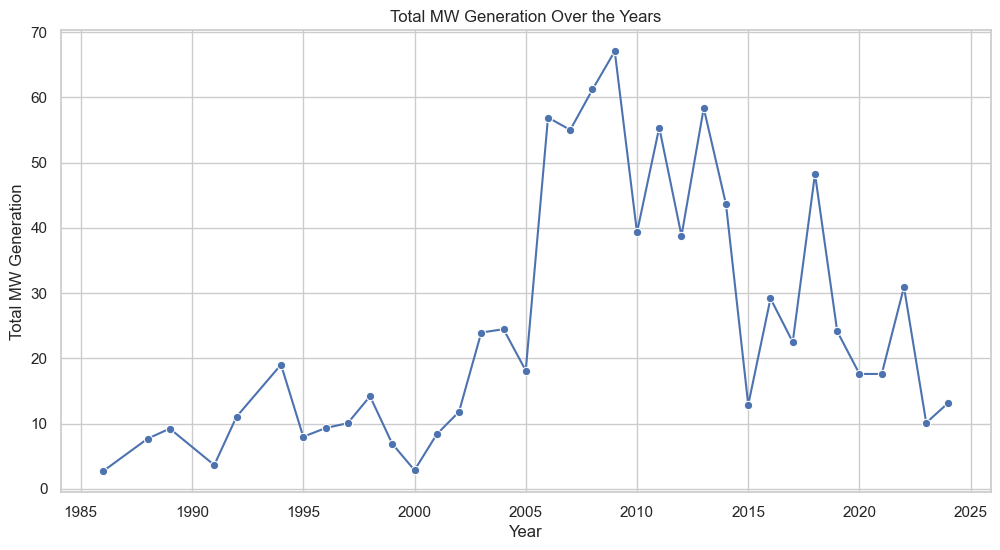

In [32]:
# Extracting year from 'Initial Project Start Date' to perform time-series analysis
df['Start Year'] = df['Initial Project Start Date'].dt.year

# Grouping by year to analyze total MW generation and emission reductions over time
yearly_data = df.groupby('Start Year').agg({
    'Total Actual MW Generation': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Direct': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Avoided': 'sum'
}).reset_index()

# Plotting Total MW Generation Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Start Year', y='Total Actual MW Generation', marker='o', color='b')
plt.title('Total MW Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Total MW Generation')
plt.grid(True)
plt.show()


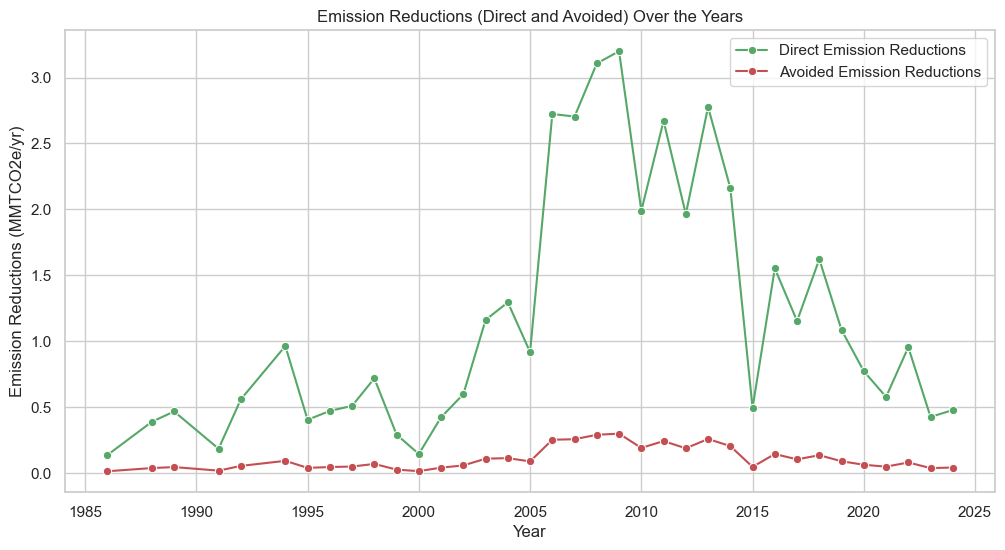

In [33]:

# Plotting Emission Reductions (Direct and Avoided) Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Start Year', y='Current Year Emission Reductions (MMTCO2e/yr) - Direct', label='Direct Emission Reductions', marker='o', color='g')
sns.lineplot(data=yearly_data, x='Start Year', y='Current Year Emission Reductions (MMTCO2e/yr) - Avoided', label='Avoided Emission Reductions', marker='o', color='r')
plt.title('Emission Reductions (Direct and Avoided) Over the Years')
plt.xlabel('Year')
plt.ylabel('Emission Reductions (MMTCO2e/yr)')
plt.legend()
plt.grid(True)
plt.show()


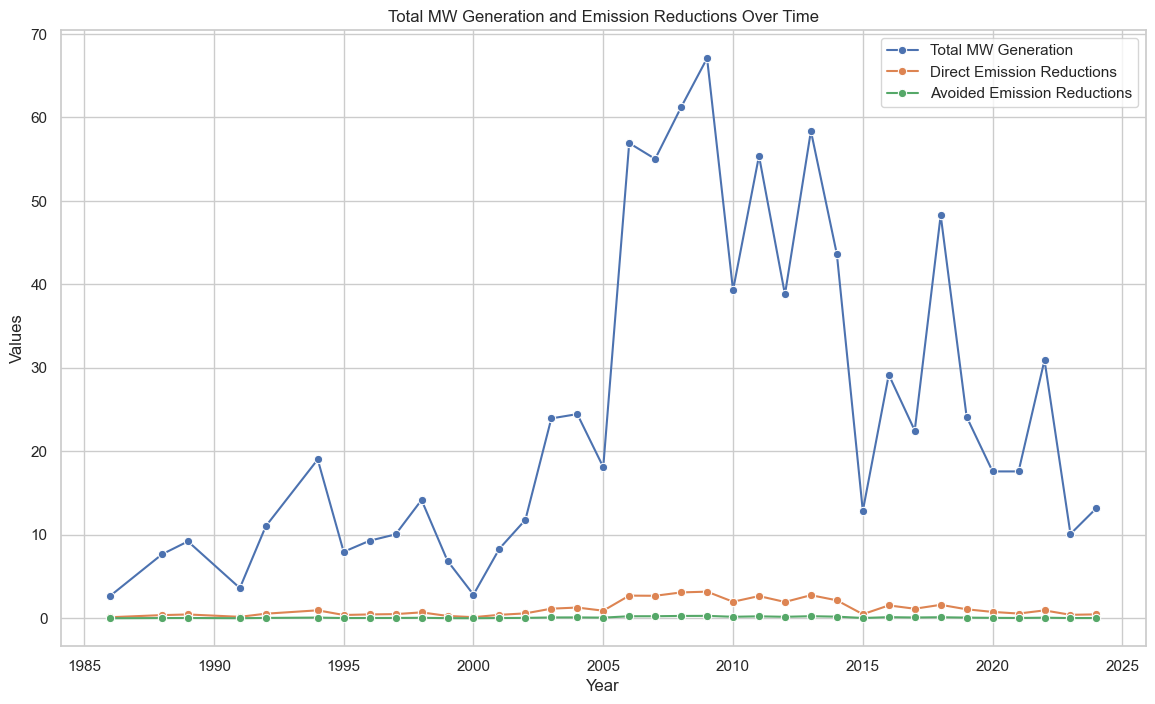

In [34]:
# 발전량 및 배출 감소 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_data, x='Start Year', y='Total Actual MW Generation', label='Total MW Generation', marker='o')
sns.lineplot(data=yearly_data, x='Start Year', y='Current Year Emission Reductions (MMTCO2e/yr) - Direct', label='Direct Emission Reductions', marker='o')
sns.lineplot(data=yearly_data, x='Start Year', y='Current Year Emission Reductions (MMTCO2e/yr) - Avoided', label='Avoided Emission Reductions', marker='o')
plt.title('Total MW Generation and Emission Reductions Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## 주별 에너지 생성 및 배출 감소 비교

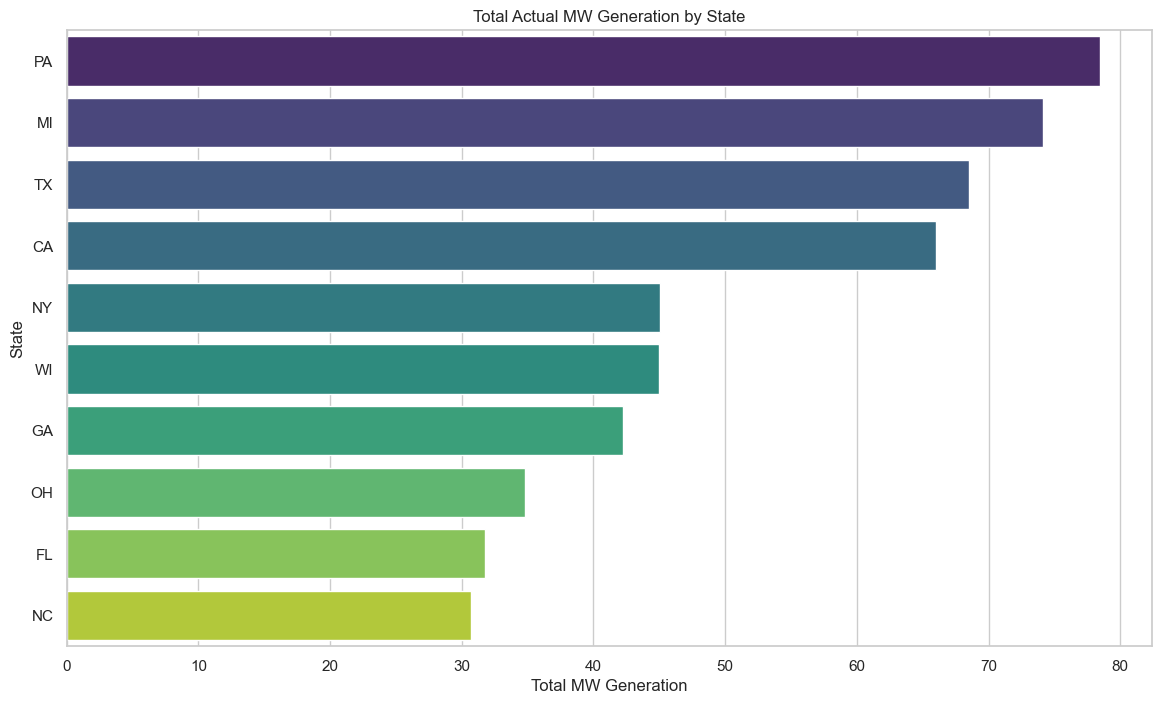

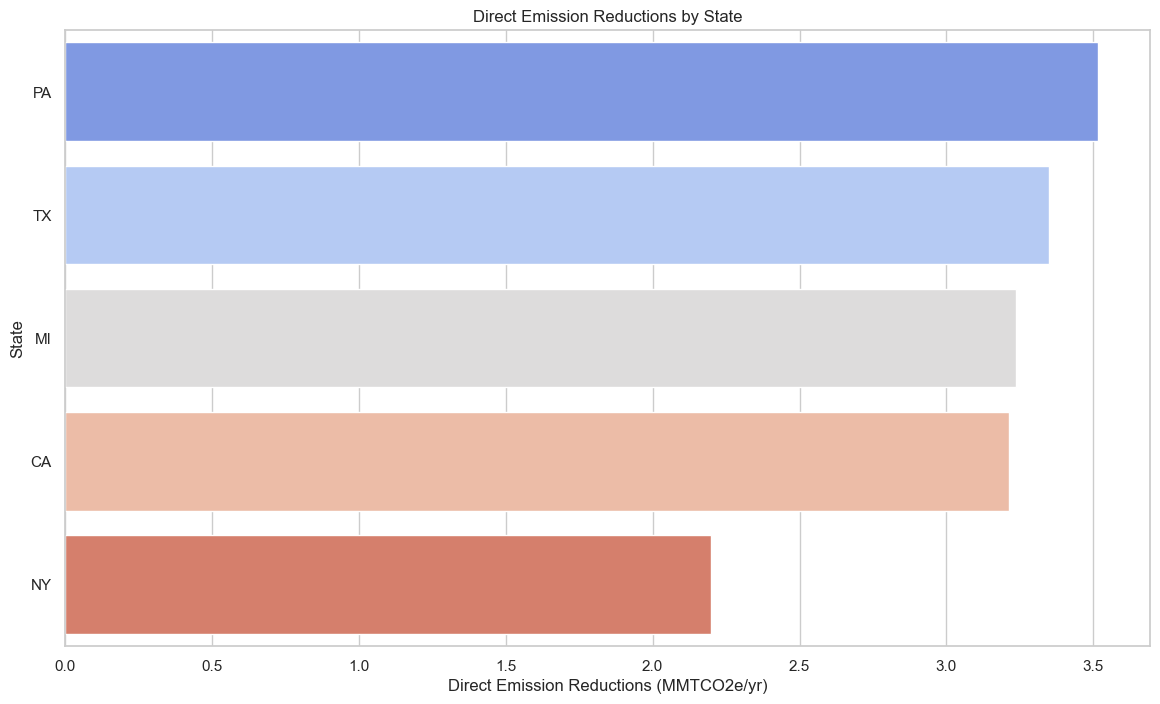

In [35]:
# Grouping data by state to analyze energy generation and emission reductions per state
state_data = df.groupby('State').agg({
    'Total Actual MW Generation': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Direct': 'sum'
}).reset_index()

# Sorting and visualizing energy generation by state
plt.figure(figsize=(14, 8))
state_data_sorted = state_data.sort_values(by='Total Actual MW Generation', ascending=False).head(10)
sns.barplot(data=state_data_sorted, x='Total Actual MW Generation', y='State', palette='viridis')
plt.title('Total Actual MW Generation by State')
plt.xlabel('Total MW Generation')
plt.ylabel('State')
plt.show()

# Sorting and visualizing emission reductions by state
plt.figure(figsize=(14, 8))
state_data_sorted = state_data.sort_values(by='Current Year Emission Reductions (MMTCO2e/yr) - Direct', ascending=False).head()
sns.barplot(data=state_data_sorted, x='Current Year Emission Reductions (MMTCO2e/yr) - Direct', y='State', palette='coolwarm')
plt.title('Direct Emission Reductions by State')
plt.xlabel('Direct Emission Reductions (MMTCO2e/yr)')
plt.ylabel('State')
plt.show()


##  프로젝트 유형별 성과 비교

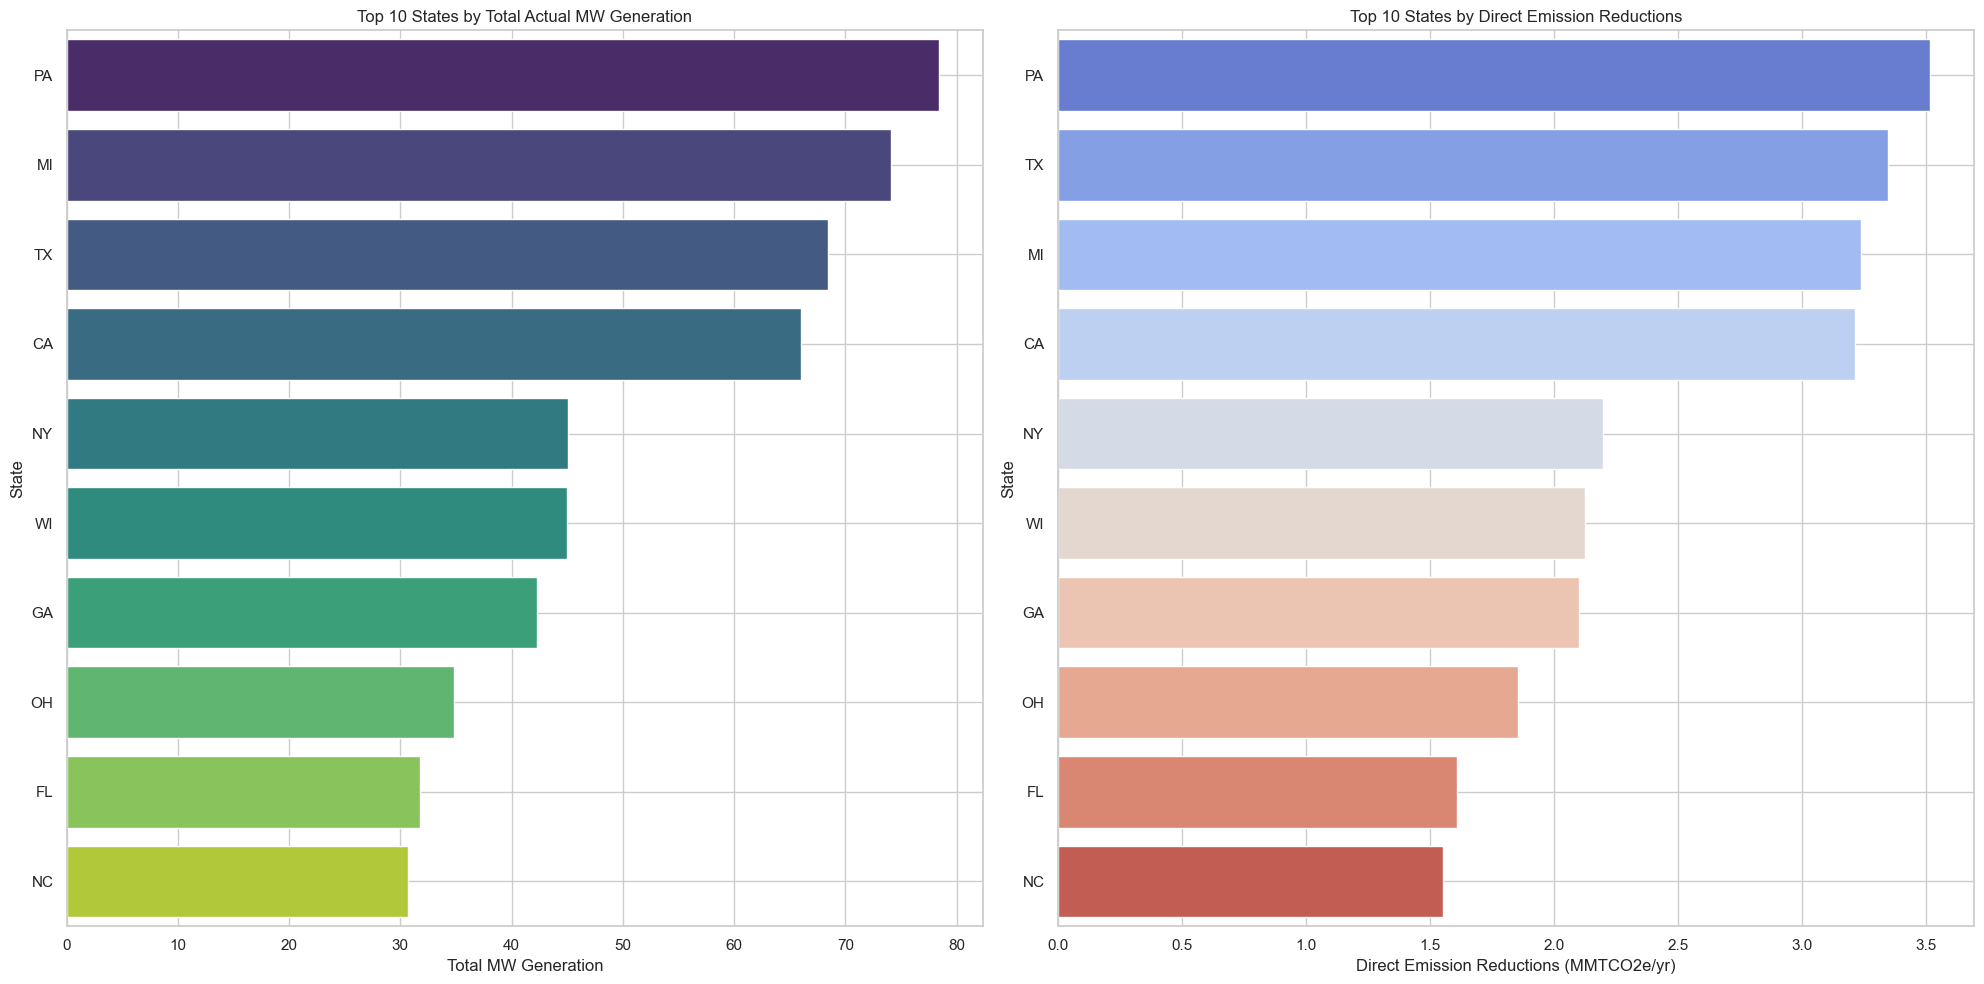

In [36]:
# Group data by state to calculate the sum of Total Actual MW Generation and Direct Emission Reductions
state_data = df.groupby('State').agg({
    'Total Actual MW Generation': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Direct': 'sum'
}).reset_index()

# Sort data and get top 10 states
top10_generation = state_data.sort_values(by='Total Actual MW Generation', ascending=False).head(10)
top10_emission_reduction = state_data.sort_values(by='Current Year Emission Reductions (MMTCO2e/yr) - Direct', ascending=False).head(10)

# Plotting the charts side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Top 10 Total Actual MW Generation by State
sns.barplot(data=top10_generation,
            x='Total Actual MW Generation', y='State', palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 States by Total Actual MW Generation')
axes[0].set_xlabel('Total MW Generation')
axes[0].set_ylabel('State')
axes[0].grid(True)

# Top 10 Direct Emission Reductions by State
sns.barplot(data=top10_emission_reduction,
            x='Current Year Emission Reductions (MMTCO2e/yr) - Direct', y='State', palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 10 States by Direct Emission Reductions')
axes[1].set_xlabel('Direct Emission Reductions (MMTCO2e/yr)')
axes[1].set_ylabel('State')
axes[1].grid(True)

plt.tight_layout()
plt.show()

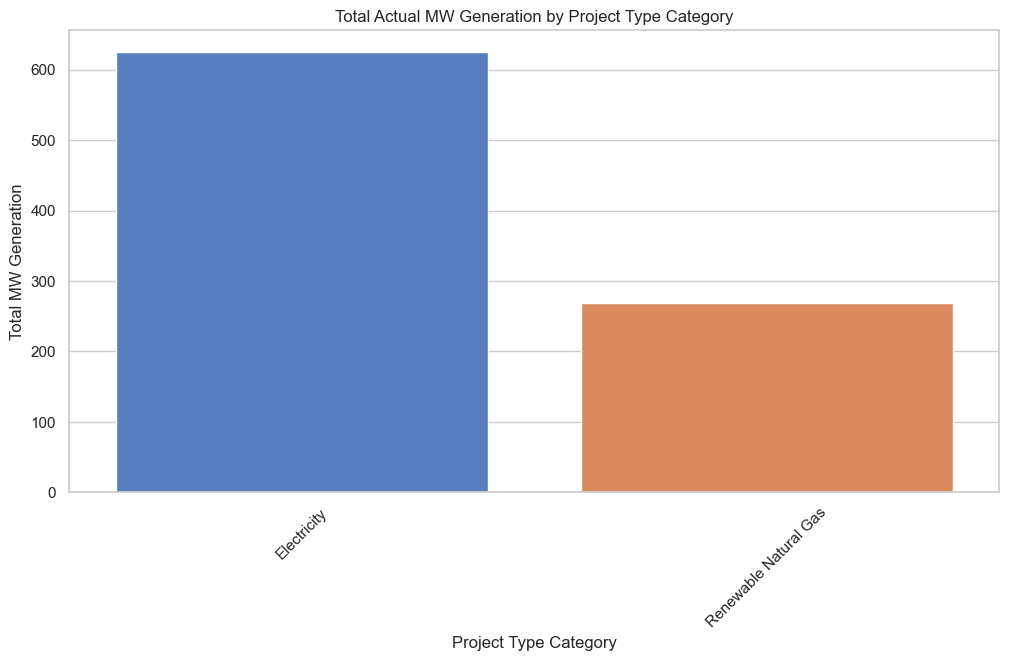

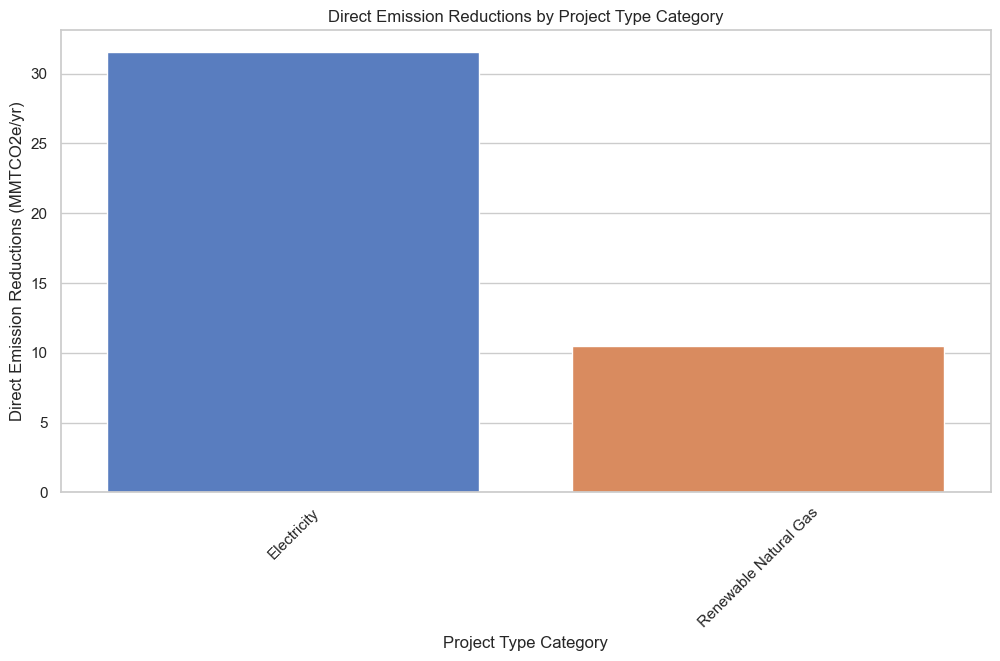

In [37]:
# Grouping data by Project Type Category to compare performance of different technologies
project_type_data = df.groupby('Project Type Category').agg({
    'Total Actual MW Generation': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Direct': 'sum'
}).reset_index()

# Visualizing energy generation by project type category
plt.figure(figsize=(12, 6))
sns.barplot(data=project_type_data, x='Project Type Category', y='Total Actual MW Generation', palette='muted')
plt.title('Total Actual MW Generation by Project Type Category')
plt.xlabel('Project Type Category')
plt.ylabel('Total MW Generation')
plt.xticks(rotation=45)
plt.show()

# Visualizing emission reductions by project type category
plt.figure(figsize=(12, 6))
sns.barplot(data=project_type_data, x='Project Type Category', y='Current Year Emission Reductions (MMTCO2e/yr) - Direct', palette='muted')
plt.title('Direct Emission Reductions by Project Type Category')
plt.xlabel('Project Type Category')
plt.ylabel('Direct Emission Reductions (MMTCO2e/yr)')
plt.xticks(rotation=45)
plt.show()


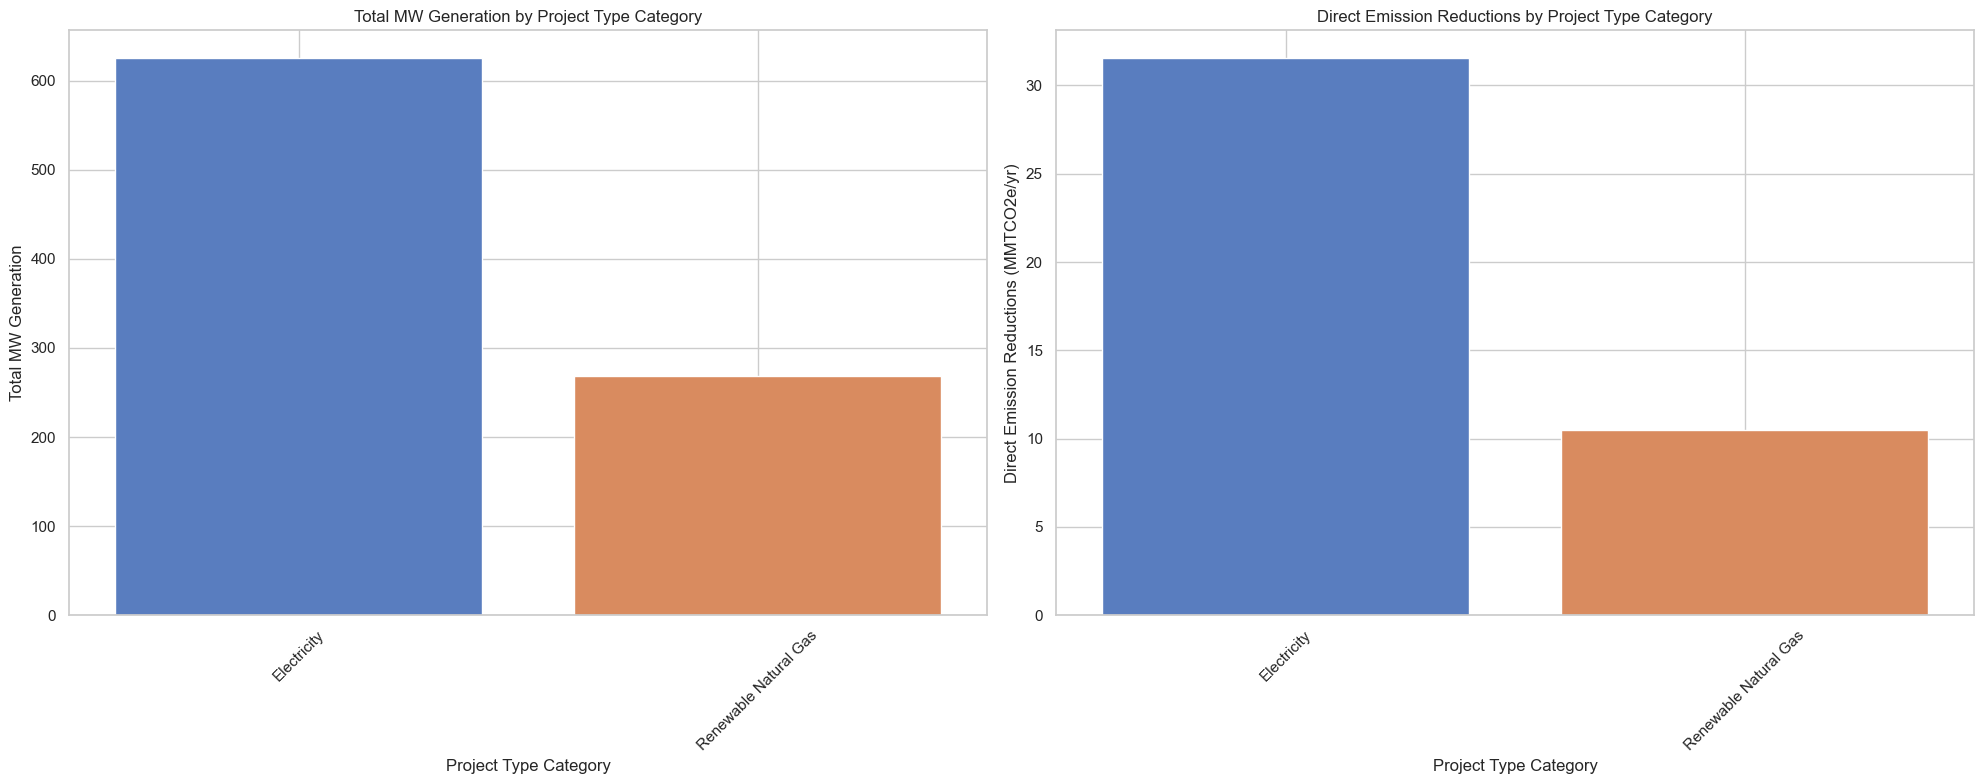

In [38]:
# Group data by project type to calculate the sum of Total Actual MW Generation and Direct Emission Reductions
project_type_data = df.groupby('Project Type Category').agg({
    'Total Actual MW Generation': 'sum',
    'Current Year Emission Reductions (MMTCO2e/yr) - Direct': 'sum'
}).reset_index()

# Plotting the charts side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Total MW Generation by Project Type
sns.barplot(data=project_type_data, x='Project Type Category', y='Total Actual MW Generation', palette='muted', ax=axes[0])
axes[0].set_title('Total MW Generation by Project Type Category')
axes[0].set_xlabel('Project Type Category')
axes[0].set_ylabel('Total MW Generation')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Direct Emission Reductions by Project Type
sns.barplot(data=project_type_data, x='Project Type Category', y='Current Year Emission Reductions (MMTCO2e/yr) - Direct', palette='muted', ax=axes[1])
axes[1].set_title('Direct Emission Reductions by Project Type Category')
axes[1].set_xlabel('Project Type Category')
axes[1].set_ylabel('Direct Emission Reductions (MMTCO2e/yr)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 프로젝트 운영 기간에 따른 효율성 분석

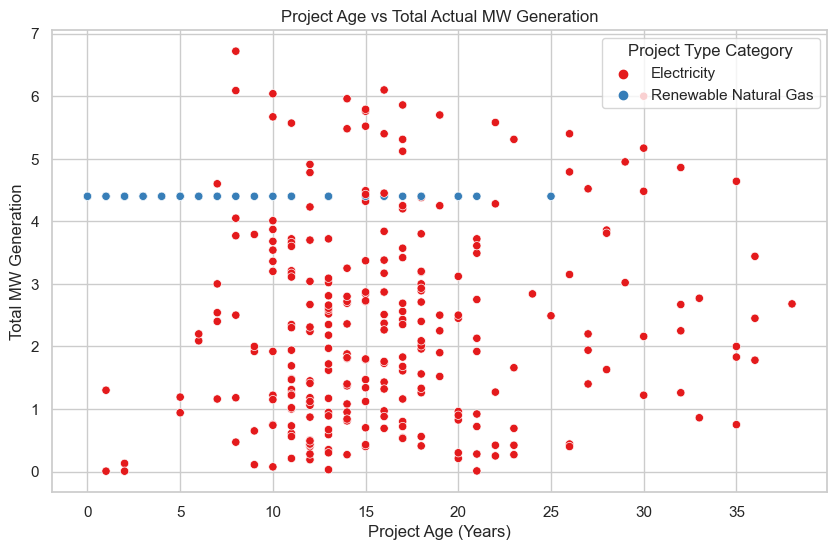

In [39]:
# Calculating project age in years
df['Project Age (Years)'] = 2024 - df['Initial Project Start Date'].dt.year

# Scatterplot to show relationship between project age and MW generation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Project Age (Years)', y='Total Actual MW Generation', hue='Project Type Category', palette='Set1')
plt.title('Project Age vs Total Actual MW Generation')
plt.xlabel('Project Age (Years)')
plt.ylabel('Total MW Generation')
plt.legend(title='Project Type Category')
plt.grid(True)
plt.show()


## 프로젝트 나이에 따른 배출 감소 분석

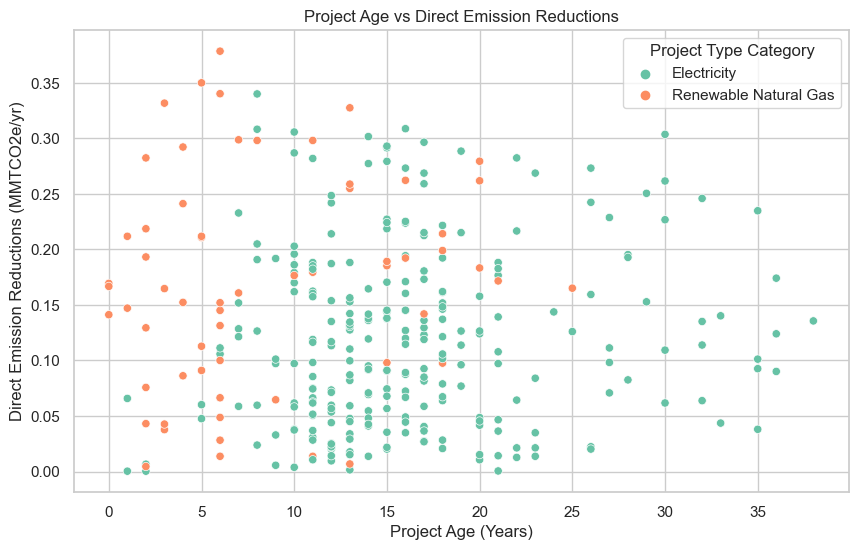

In [40]:
# Scatterplot to show relationship between project age and emission reductions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Project Age (Years)', y='Current Year Emission Reductions (MMTCO2e/yr) - Direct', hue='Project Type Category', palette='Set2')
plt.title('Project Age vs Direct Emission Reductions')
plt.xlabel('Project Age (Years)')
plt.ylabel('Direct Emission Reductions (MMTCO2e/yr)')
plt.legend(title='Project Type Category')
plt.grid(True)
plt.show()
